Saving HR-Employee-Attrition.csv to HR-Employee-Attrition.csv
Dataset Overview:

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1              

<ipython-input-2-0e670f630588>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Attrition'] = data['Attrition'].map(attrition_mapping)


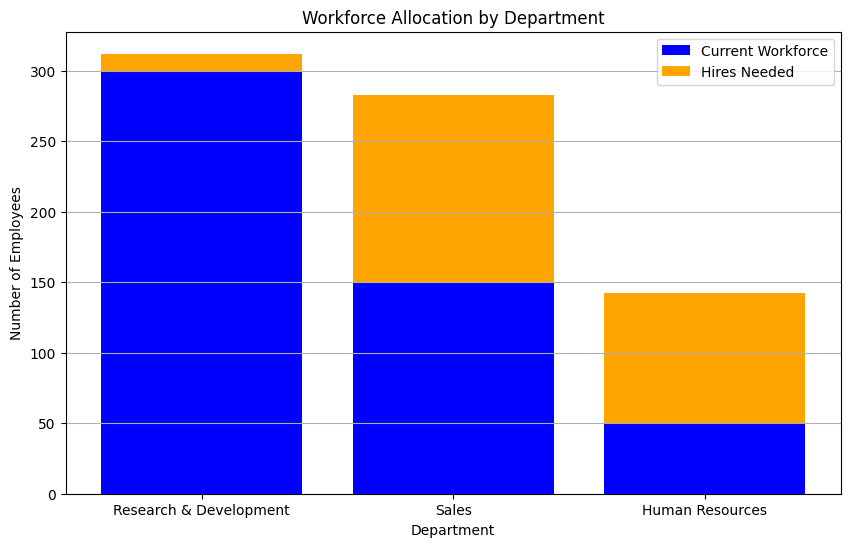

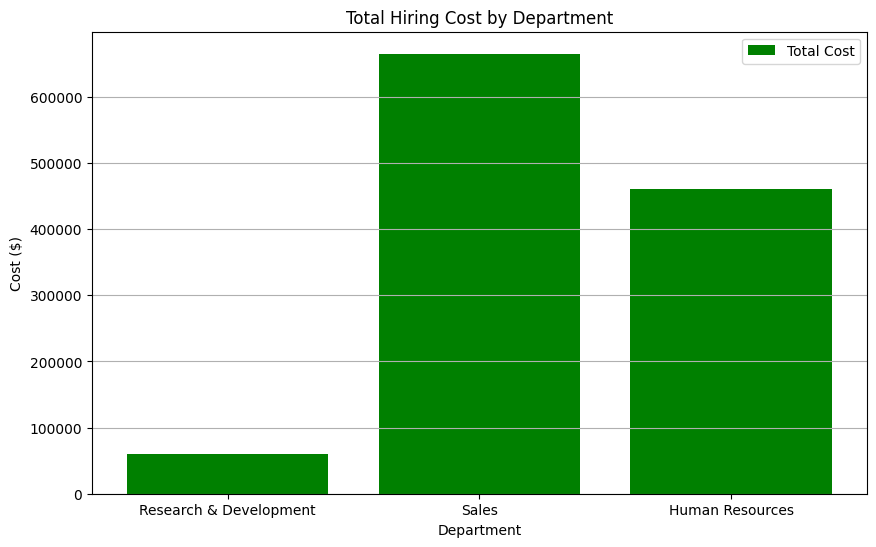

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

# Step 1: Load the HR Employee Attrition Dataset
from google.colab import files

# Upload the file
uploaded = files.upload()

# Read the dataset
data = pd.read_csv('HR-Employee-Attrition.csv')

# Display basic information about the dataset
print("Dataset Overview:\n")
print(data.head())
print("\nDataset Info:\n")
print(data.info())

# Step 2: Data Preparation
# Filter relevant columns
columns_of_interest = ['Department', 'MonthlyIncome', 'Attrition', 'JobSatisfaction', 'WorkLifeBalance']
data = data[columns_of_interest]

# Replace categorical values with numerical ones
attrition_mapping = {'Yes': 1, 'No': 0}
data['Attrition'] = data['Attrition'].map(attrition_mapping)

# Group data by Department
department_group = data.groupby('Department').agg({
    'MonthlyIncome': 'mean',
    'Attrition': 'sum',
    'JobSatisfaction': 'mean',
    'WorkLifeBalance': 'mean'
}).reset_index()

print("\nGrouped Data by Department:\n", department_group)

# Step 3: Define Optimization Problem
# Simulate workforce needs based on attrition and department sizes
current_workforce = {
    'Research & Development': 300,
    'Sales': 150,
    'Human Resources': 50
}

required_workforce = {
    department: int(current_workforce[department] + group['Attrition'])
    for department, group in zip(current_workforce.keys(), department_group.to_dict(orient='records'))
}

print("\nRequired Workforce Plan:\n", required_workforce)

# Simulate hiring and overtime costs
hiring_cost = 5000  # Cost per hire
overtime_cost = 300  # Cost per hour

hires_needed = {
    dept: required_workforce[dept] - current_workforce[dept]
    for dept in current_workforce.keys()
}

# Step 4: Optimize Costs
# Simulate constraints and costs
costs = [hiring_cost * hires for hires in hires_needed.values()]
departments = list(current_workforce.keys())

# Results in a DataFrame
optimization_results = pd.DataFrame({
    'Department': departments,
    'Current Workforce': list(current_workforce.values()),
    'Required Workforce': list(required_workforce.values()),
    'Hires Needed': list(hires_needed.values()),
    'Cost Estimate ($)': costs
})

print("\nOptimization Results:\n", optimization_results)

# Step 5: Visualize Results
# Bar chart of workforce allocation
plt.figure(figsize=(10, 6))
x = optimization_results['Department']

# Plot current and required workforce
plt.bar(x, optimization_results['Current Workforce'], color='blue', label='Current Workforce')
plt.bar(x, optimization_results['Hires Needed'], bottom=optimization_results['Current Workforce'], color='orange', label='Hires Needed')

plt.title('Workforce Allocation by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.legend()
plt.grid(axis='y')
plt.show()

# Plot total costs
plt.figure(figsize=(10, 6))
plt.bar(x, optimization_results['Cost Estimate ($)'], color='green', label='Total Cost')
plt.title('Total Hiring Cost by Department')
plt.xlabel('Department')
plt.ylabel('Cost ($)')
plt.legend()
plt.grid(axis='y')
plt.show()